### Data collection in json formate using API and data mining 

## Task 1 
#### In this exercise, Co2 concentration data has been collected from the website https://global-warming.org using its API. 

In [1]:
# All needed dapdas libraries 

import pandas as pd
import requests 
import json
import csv
import urllib
from pathlib import Path
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
%matplotlib inline

## Co2 json data 
This is a JSON data set containing information about the concentration of carbon dioxide (CO2) in the Earth's atmosphere. The data covers a period from January 20, 2013 to March 21, 2023 and is reported on a daily basis in parts per million (ppm). The data is important for understanding the ongoing trend of increasing CO2 concentration in the atmosphere, which is a major contributor to climate change. By analyzing this data, we can better understand the long-term changes in CO2 concentration. 

In [3]:
url_co2 = "https://global-warming.org/api/co2-api"
response = requests.get(url_co2)
data_co2 = json.loads(response.text)
print(data_co2)

{'co2': [{'year': '2013', 'month': '2', 'day': '6', 'cycle': '396.08', 'trend': '394.59'}, {'year': '2013', 'month': '2', 'day': '7', 'cycle': '396.10', 'trend': '394.59'}, {'year': '2013', 'month': '2', 'day': '8', 'cycle': '396.12', 'trend': '394.60'}, {'year': '2013', 'month': '2', 'day': '9', 'cycle': '396.14', 'trend': '394.61'}, {'year': '2013', 'month': '2', 'day': '10', 'cycle': '396.16', 'trend': '394.62'}, {'year': '2013', 'month': '2', 'day': '11', 'cycle': '396.18', 'trend': '394.62'}, {'year': '2013', 'month': '2', 'day': '12', 'cycle': '396.20', 'trend': '394.63'}, {'year': '2013', 'month': '2', 'day': '13', 'cycle': '396.22', 'trend': '394.64'}, {'year': '2013', 'month': '2', 'day': '14', 'cycle': '396.24', 'trend': '394.65'}, {'year': '2013', 'month': '2', 'day': '15', 'cycle': '396.25', 'trend': '394.65'}, {'year': '2013', 'month': '2', 'day': '16', 'cycle': '396.27', 'trend': '394.66'}, {'year': '2013', 'month': '2', 'day': '17', 'cycle': '396.28', 'trend': '394.67'},

## Pprint library is used for the better readability of the json data. 

In [4]:
from pprint import pprint
pprint(data_co2)

{'co2': [{'cycle': '396.08',
          'day': '6',
          'month': '2',
          'trend': '394.59',
          'year': '2013'},
         {'cycle': '396.10',
          'day': '7',
          'month': '2',
          'trend': '394.59',
          'year': '2013'},
         {'cycle': '396.12',
          'day': '8',
          'month': '2',
          'trend': '394.60',
          'year': '2013'},
         {'cycle': '396.14',
          'day': '9',
          'month': '2',
          'trend': '394.61',
          'year': '2013'},
         {'cycle': '396.16',
          'day': '10',
          'month': '2',
          'trend': '394.62',
          'year': '2013'},
         {'cycle': '396.18',
          'day': '11',
          'month': '2',
          'trend': '394.62',
          'year': '2013'},
         {'cycle': '396.20',
          'day': '12',
          'month': '2',
          'trend': '394.63',
          'year': '2013'},
         {'cycle': '396.22',
          'day': '13',
          'month': '2',
    

         {'cycle': '414.40',
          'day': '22',
          'month': '5',
          'trend': '412.53',
          'year': '2020'},
         {'cycle': '414.38',
          'day': '23',
          'month': '5',
          'trend': '412.54',
          'year': '2020'},
         {'cycle': '414.36',
          'day': '24',
          'month': '5',
          'trend': '412.54',
          'year': '2020'},
         {'cycle': '414.35',
          'day': '25',
          'month': '5',
          'trend': '412.55',
          'year': '2020'},
         {'cycle': '414.32',
          'day': '26',
          'month': '5',
          'trend': '412.55',
          'year': '2020'},
         {'cycle': '414.30',
          'day': '27',
          'month': '5',
          'trend': '412.56',
          'year': '2020'},
         {'cycle': '414.28',
          'day': '28',
          'month': '5',
          'trend': '412.57',
          'year': '2020'},
         {'cycle': '414.25',
          'day': '29',
          'month': '5',


##  The json data is transformed to a CSV data formate to facilitate data analysis. 

In [6]:
with open('co2_data.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['cycle', 'day', 'month', 'trend', 'year'])

    # Write each data row keys and values to the CSV file
    for record in data_co2['co2']:
        writer.writerow([record['cycle'], record['day'], record['month'], record['trend'], record['year']])

# The data is saved to 'co2_data.csv'.

# Task 2 

## Working with the Co2 csv data  

In [7]:
# csv data import 

data_co2 = pd.read_csv('co2_data.csv')
data_co2

,cycle,day,month,trend,year
0,396.08,6,2,394.59,2013
1,396.10,7,2,394.59,2013
2,396.12,8,2,394.60,2013
3,396.14,9,2,394.61,2013
4,396.16,10,2,394.62,2013
...,...,...,...,...,...
3962,421.66,13,12,420.59,2023
3963,421.68,14,12,420.60,2023
3964,421.69,15,12,420.61,2023
3965,421.71,16,12,420.61,2023


## Data Exploration 

In [8]:
data_co2.shape

(3967, 5)

In [9]:
data_co2.dtypes

cycle    float64
day        int64
month      int64
trend    float64
year       int64
dtype: object

In [10]:
data_co2.columns

Index(['cycle', 'day', 'month', 'trend', 'year'], dtype='object')

In [11]:
data_co2['cycle'].mean()

407.6806377615331

In [12]:
data_co2['trend'].mean()

407.6938921099069

## Data Cleaning / Preperation 

In [13]:
# Combining the year, month, and day columns into a single date column

data_co2['date'] = pd.to_datetime(data_co2[['year', 'month', 'day']])
df = data_co2


# drop the original year, month, day columns
df = df.drop(['year', 'month', 'day'], axis=1)


# re-order columns as I want data column to be the first column. 
df = df[['date', 'cycle', 'trend']]


# reset index
df = df.reset_index(drop=True) 
df 

,date,cycle,trend
0,2013-02-06,396.08,394.59
1,2013-02-07,396.10,394.59
2,2013-02-08,396.12,394.60
3,2013-02-09,396.14,394.61
4,2013-02-10,396.16,394.62
...,...,...,...
3962,2023-12-13,421.66,420.59
3963,2023-12-14,421.68,420.60
3964,2023-12-15,421.69,420.61
3965,2023-12-16,421.71,420.61


In [14]:
# Now the date data type is datetime. 

df.dtypes 

date     datetime64[ns]
cycle           float64
trend           float64
dtype: object

##  As the Co2 data for 2013 and 2023 is incomplete, these years are dropped from the dataset to ensure the accuracy of the analysis.

In [15]:
# select data between 2014-01-01 and 2022-12-31. Because there are some months and days missing in 2013 and 2023. 

mask = (df['date'] >= '2014-01-01') & (df['date'] <= '2022-12-31')
df_filtered = df.loc[mask]

# reset the index again 
df_filtered = df_filtered.reset_index(drop=True) 
df_filtered

,date,cycle,trend
0,2014-01-01,397.69,396.67
1,2014-01-02,397.71,396.68
2,2014-01-03,397.72,396.68
3,2014-01-04,397.73,396.69
4,2014-01-05,397.74,396.69
...,...,...,...
3282,2022-12-27,419.10,418.08
3283,2022-12-28,419.11,418.08
3284,2022-12-29,419.11,418.09
3285,2022-12-30,419.12,418.10


## The number of days are converted to months and calculated the monthly averages for both the cycle and trend values. 

In [16]:
# Converted the date column to datetime format year and month
co2_monthly_mean = df_filtered.groupby(df_filtered['date'].dt.strftime('%Y-%m'))[['cycle', 'trend']].mean()


# round the values of cycle and trend to two decimals
co2_monthly_mean = co2_monthly_mean.round(2)


# Added the year_month as a separate column
co2_monthly_mean['year_month'] = co2_monthly_mean.index

# Set year_month as the first column
co2_monthly_mean = co2_monthly_mean[['year_month', 'cycle', 'trend']]

co2_monthly_mean.reset_index(drop=True) 
co2_monthly_mean

,year_month,cycle,trend
date,,,
2014-01,2014-01,397.87,396.75
2014-02,2014-02,398.33,396.91
2014-03,2014-03,398.78,397.06
2014-04,2014-04,399.06,397.22
2014-05,2014-05,399.28,397.37
...,...,...,...
2022-08,2022-08,413.87,417.41
2022-09,2022-09,414.18,417.55
2022-10,2022-10,415.88,417.70


## A line chart showing cycle and trend components over the years

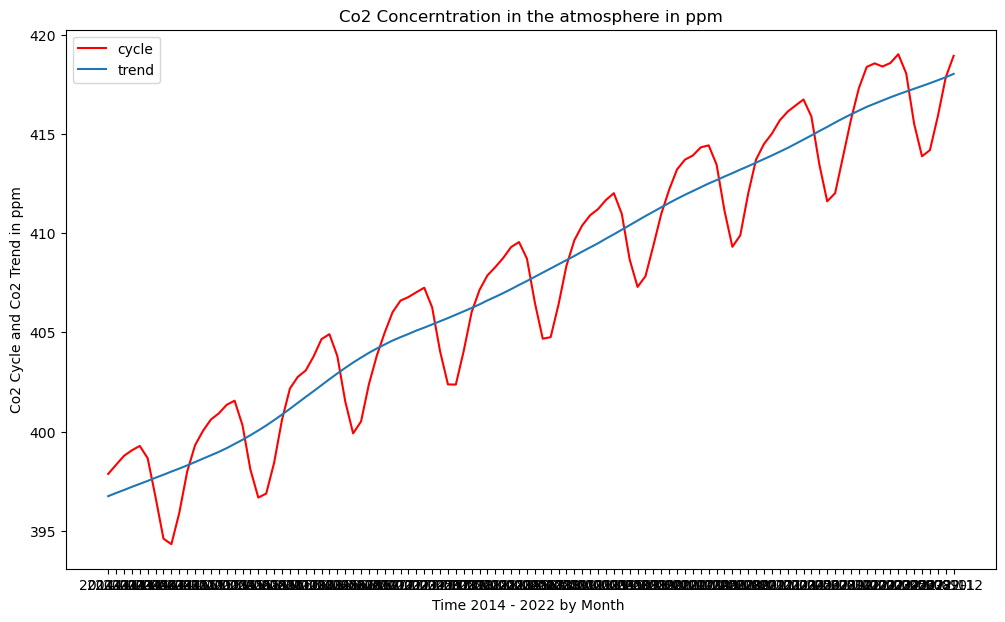

In [17]:
# figure size
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(co2_monthly_mean['year_month'], co2_monthly_mean['cycle'], label='cycle', color = 'red')
plt.plot(co2_monthly_mean['year_month'], co2_monthly_mean['trend'], label='trend')
plt.title('Co2 Concerntration in the atmosphere in ppm')
plt.xlabel('Time 2014 - 2022 by Month ')
plt.ylabel('Co2 Cycle and Co2 Trend in ppm')
plt.legend()
plt.show()

This graph shows the monthly mean concentration of Co2 in the atmosphere from 2014 to 2022. The red line represent  Co2 cycle and the blue represent the trend. The x-axis represents time in months, and the y-axis represents the concentration of Co2 in parts per million (ppm). The graph highlights the cyclical nature of Co2 concentration, with a seasonal pattern of higher levels of Co2 in the winter months and lower levels in the summer months. The trend line shows the overall increase in Co2 concentration over the years. Co2 considered to be a major contributor to climate change. The graph provides a comprehensive view of Co2 concentration over time and highlights the need for action to mitigate the effects of increasing Co2 levels in the atmosphere.

## Co2 concertration in the atmosphere in 2014 by months. 

In [18]:
co2_2014 = co2_monthly_mean.loc['2014-01':'2014-12'].round(2)
co2_2014

,year_month,cycle,trend
date,,,
2014-01,2014-01,397.87,396.75
2014-02,2014-02,398.33,396.91
2014-03,2014-03,398.78,397.06
2014-04,2014-04,399.06,397.22
2014-05,2014-05,399.28,397.37
2014-06,2014-06,398.66,397.52
2014-07,2014-07,396.69,397.68
2014-08,2014-08,394.61,397.83
2014-09,2014-09,394.33,397.99


# Co2 concertration in the atmosphere in 2022 by months.

In [19]:
co2_2022 = co2_monthly_mean.loc['2022-01':'2022-12'].round(2)
co2_2022

,year_month,cycle,trend
date,,,
2022-01,2022-01,418.37,416.36
2022-02,2022-02,418.55,416.52
2022-03,2022-03,418.39,416.68
2022-04,2022-04,418.57,416.84
2022-05,2022-05,419.01,416.99
2022-06,2022-06,418.04,417.13
2022-07,2022-07,415.51,417.27
2022-08,2022-08,413.87,417.41
2022-09,2022-09,414.18,417.55


# Year 2014 Co2 data by months 

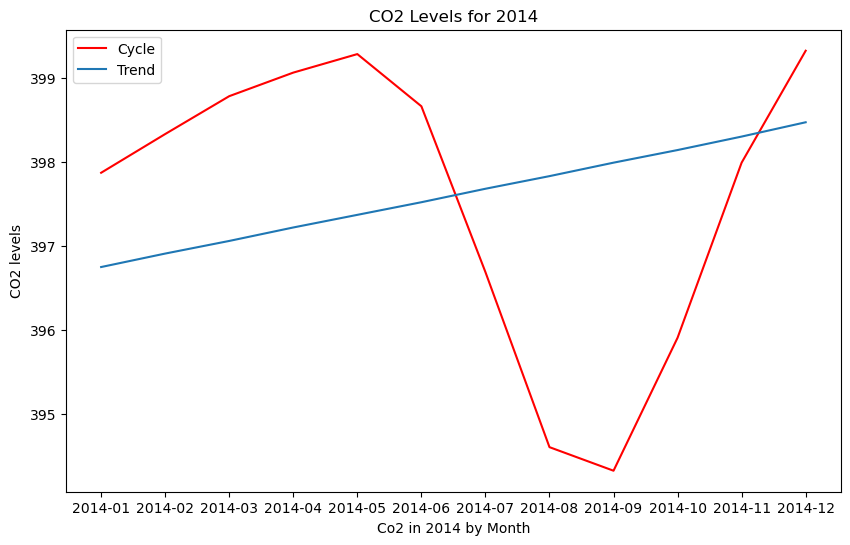

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(co2_2014['year_month'], co2_2014['cycle'], label='Cycle', color = 'red')
plt.plot(co2_2014['year_month'], co2_2014['trend'], label='Trend')
plt.xlabel('Co2 in 2014 by Month')
plt.ylabel('CO2 levels')
plt.title('CO2 Levels for 2014')
plt.legend()
plt.show()


This graph shows the cycle and trend data of Co2 levels for the year 2014. The x-axis represents the month, and the y-axis represents the concentration of Co2 in parts per million (ppm). The red line represents the cycle of Co2 levels, which shows the seasonal variation in Co2 concentration with higher levels in the winter months and lower levels in the summer months. The blue line represents the trend of Co2 levels, which shows the overall increase in Co2 concentration over time. The graph highlights the cyclical and upward trend of Co2 levels in 2014. 

# Year 2022 Co2 data by months

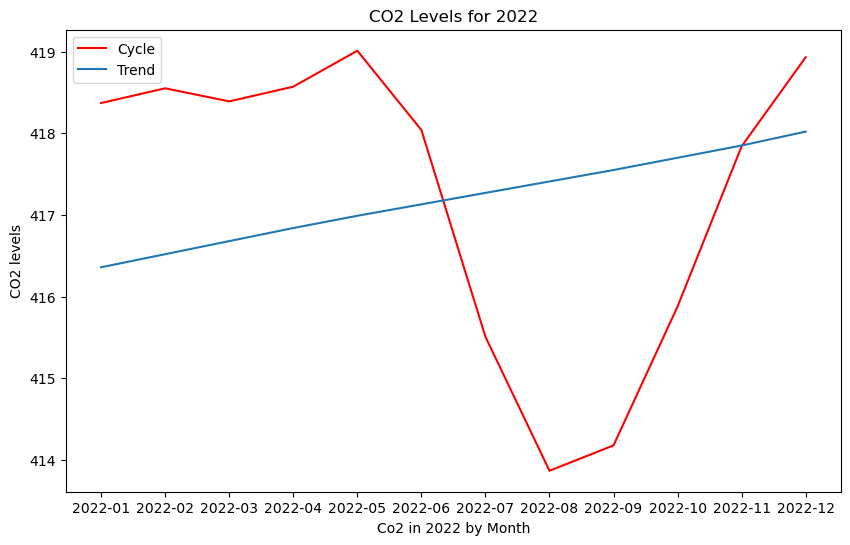

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(co2_2022['year_month'], co2_2022['cycle'], label='Cycle', color = 'red')
plt.plot(co2_2022['year_month'], co2_2022['trend'], label='Trend')
plt.xlabel('Co2 in 2022 by Month')
plt.ylabel('CO2 levels')
plt.title('CO2 Levels for 2022')
plt.legend()
plt.show()


This graph shows the monthly mean concentration of Co2 in the atmosphere for the year 2022. The pattern in the graph is similar to the 2014. The Co2 concentration has increased greatly from around 390 PPM in 2014 to around 420 PPM in 2022.

## Converted the data from monthly to yearly by aggregating the mean values of Co2 cycle and Co2 trend for each year.

In [22]:
# Adding 1 month to each year_month value
co2_monthly_mean['year_month'] = pd.to_datetime(co2_monthly_mean['year_month'])
co2_monthly_mean['year_month'] = co2_monthly_mean['year_month'] + pd.DateOffset(months=1)


# Groupped the data by year and calculate the mean of cycle and trend for each group
df_grouped = co2_monthly_mean.groupby(pd.Grouper(key='year_month', freq='Y')).mean(numeric_only=True)
df_grouped = df_grouped.round(2)
df_grouped = df_grouped.reset_index()
df_grouped 


,year_month,cycle,trend
0,2014-12-31,397.41,397.52
1,2015-12-31,399.57,399.56
2,2016-12-31,402.78,402.74
3,2017-12-31,405.32,405.32
4,2018-12-31,407.53,407.50
5,2019-12-31,410.08,410.07
6,2020-12-31,412.60,412.56
7,2021-12-31,414.75,414.83
8,2022-12-31,417.13,417.04
9,2023-12-31,418.93,418.02


## Graph of the Co2 cycle and trend data aggregated yearly 

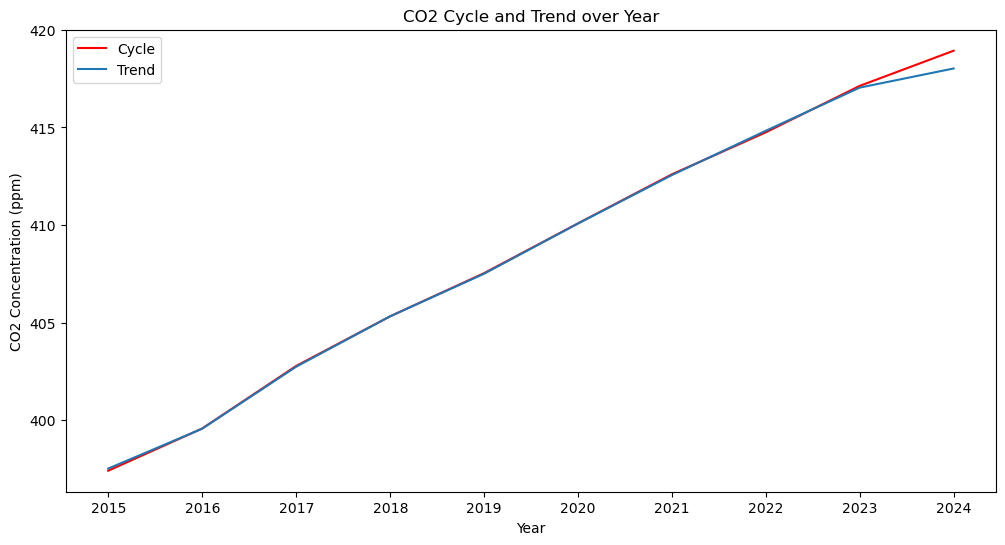

In [23]:

plt.figure(figsize=(12, 6))

# Plot the cycle and trend data as lines
plt.plot(df_grouped ['year_month'], df_grouped ['cycle'], label='Cycle', color = 'red')
plt.plot(df_grouped ['year_month'], df_grouped ['trend'], label='Trend')
plt.title('CO2 Cycle and Trend over Year')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.show()


This graph shows the Co2 cycle and trend over the years. The x-axis represents the years and the y-axis represents the concentration of Co2 in parts per million (ppm). The red line shows the seasonal cycle of Co2 concentration, which represents the annual variation in CO2 levels. The blue line shows the overall trend in Co2 concentration over the years. Both the cycle and the trend line show a gradual increase in Co2 concentration over time. The graph emphasizes the long-term trend of increasing Co2 concentration in the atmosphere and the need for urgent action to address climate change.

## Individual line plots for each year, showcasing the annual trends in the data

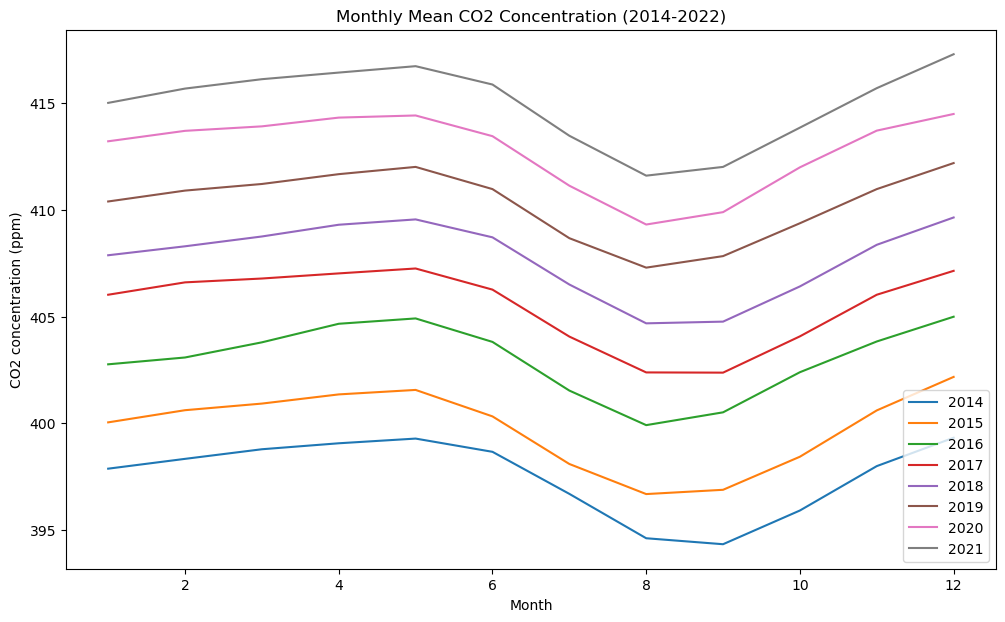

In [24]:
# index to pandas datetime index

co2_monthly_mean.index = pd.to_datetime(co2_monthly_mean.index)
fig, ax = plt.subplots(figsize=(12, 7))

# select the years from 2014 to 2022

for year in range(2014, 2022):
    df_year = co2_monthly_mean[co2_monthly_mean.index.year == year]
    ax.plot(df_year.index.month, df_year['cycle'], label=str(year))


ax.set_xlabel('Month')
ax.set_ylabel('CO2 concentration (ppm)')
ax.set_title('Monthly Mean CO2 Concentration (2014-2022)')
ax.legend()
plt.show()


This graph shows the monthly mean concentration of Co2 in the atmosphere from 2014 to 2022. The x-axis represents the month, and the y-axis represents the concentration of Co2 in parts per million (ppm). The graph illustrates the cyclical and seasonal nature of Co2 concentration, with a gradual increase in concentration over the years. The lines plotted for each year shows the seasonality of Co2 concentration, with higher levels of Co2 in the winter months and lower levels in the summer months. Overall, the graph highlights the ongoing trend of increasing Co2 concentration in the atmosphere, which is a major contributor to climate change. The Co2 concentration has increased from around 390 PPM in 2014 to around 420 PPM in 2022. A total increase of approximately 30 PPM over the eight-year period. 